Minkowski Hyperplane Normal Vector: [0.00371221 0.00123003 0.99999235]
Maximum Margin Hyperplane Normal Vector: [ 0.0056581  -0.00208174  1.96768003]

Comparison:
Minkowski Hyperplane Normal Vector: [0.00371221 0.00123003 0.99999235]
Maximum Margin Hyperplane Normal Vector: [ 0.0056581  -0.00208174  1.96768003]


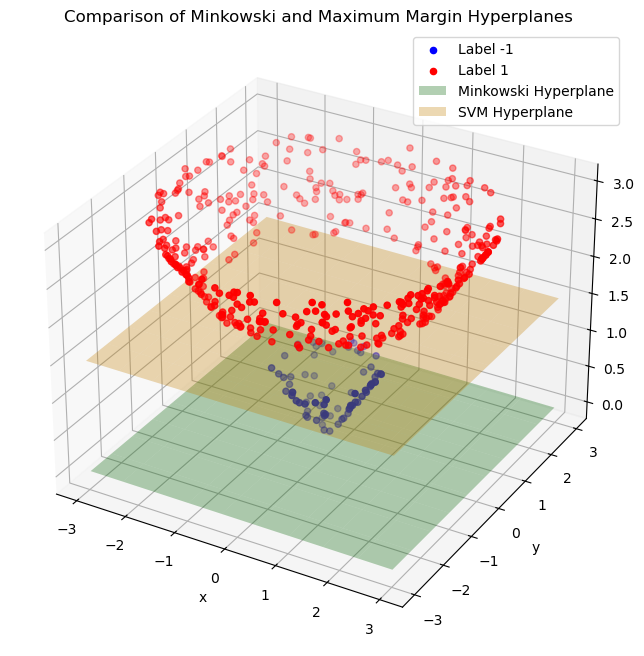

In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import ConvexHull
from scipy.optimize import minimize
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data
file_name = "input2.csv"  # Replace with your file name
data = pd.read_csv(file_name)

# Ensure the column names are appropriate
x = data['x']
y = data['y']
labels = data['label']

# Compute z = sqrt(x^2 + y^2)
z = np.sqrt(x**2 + y**2)
data['z'] = z

# Separate points by label
class_neg1 = data[labels == -1][['x', 'y', 'z']].values
class_pos1 = data[labels == 1][['x', 'y', 'z']].values

# Minkowski Hyperplane
def minkowski_distance(w):
    """Compute the distance between the two convex hulls along the direction w."""
    w = w / np.linalg.norm(w)  # Normalize the direction vector
    proj_neg1 = np.dot(class_neg1, w)
    proj_pos1 = np.dot(class_pos1, w)
    return np.max(proj_neg1) - np.min(proj_pos1)

# Optimize to find the direction minimizing the distance
res = minimize(minkowski_distance, np.random.rand(3), method='BFGS')
w_minkowski = res.x / np.linalg.norm(res.x)
print("Minkowski Hyperplane Normal Vector:", w_minkowski)

# Maximum Margin Hyperplane using SVM
X = data[['x', 'y', 'z']].values
y = data['label'].values

# Train a linear SVM
svm = SVC(kernel='linear')
svm.fit(X, y)

# Extract the hyperplane parameters
w_svm = svm.coef_[0]  # Normal vector
b_svm = svm.intercept_[0]  # Intercept
print("Maximum Margin Hyperplane Normal Vector:", w_svm)

# Compare the hyperplanes
print("\nComparison:")
print("Minkowski Hyperplane Normal Vector:", w_minkowski)
print("Maximum Margin Hyperplane Normal Vector:", w_svm)

# Plot the points and hyperplanes
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of points
ax.scatter(class_neg1[:, 0], class_neg1[:, 1], class_neg1[:, 2], color='blue', label='Label -1')
ax.scatter(class_pos1[:, 0], class_pos1[:, 1], class_pos1[:, 2], color='red', label='Label 1')

# Plot Minkowski hyperplane
xx, yy = np.meshgrid(np.linspace(data['x'].min(), data['x'].max(), 10),
                     np.linspace(data['y'].min(), data['y'].max(), 10))
zz_minkowski = (-w_minkowski[0] * xx - w_minkowski[1] * yy) / w_minkowski[2]
ax.plot_surface(xx, yy, zz_minkowski, alpha=0.3, color='green', label='Minkowski Hyperplane')

# Plot SVM hyperplane
zz_svm = (-w_svm[0] * xx - w_svm[1] * yy - b_svm) / w_svm[2]
ax.plot_surface(xx, yy, zz_svm, alpha=0.3, color='orange', label='SVM Hyperplane')

# Customize the plot
ax.set_title('Comparison of Minkowski and Maximum Margin Hyperplanes')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()
